In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20,8]

df_score = pd.read_csv('thtd12/result_anomaly_score_temp1.csv')
df_status = pd.read_csv('thtd12/result_anomaly_status_temp1.csv')
df_data = pd.read_csv('thtd12/result_data_temp1.csv')
df_thresh = pd.read_csv('thtd12/result_anomaly_threshold_temp1.csv')
print(df_score.describe())
print(df_status.describe())
print(df_data.describe())
print(df_thresh.describe())
df_status = df_status.replace('abnormal', -1, regex=True)
df_status = df_status.replace('normal', 1, regex=True)
df_status.value_counts()

              score
count  64645.000000
mean       0.205926
std        0.067376
min       -0.076000
25%        0.198000
50%        0.223000
75%        0.251000
max        0.262000
          status
count      64645
unique         2
top     'normal'
freq       64318
               data
count  64645.000000
mean      25.753129
std        1.588116
min        4.200000
25%       24.700000
50%       25.800000
75%       26.800000
max       89.500000
          threshold
count  64645.000000
mean      -0.045666
std        0.074178
min       -0.150000
25%       -0.150000
50%        0.010000
75%        0.010000
max        0.010000


status
 1        64318
-1          327
dtype: int64

<class 'pandas.core.series.Series'>


C:\Users\Radityo Fajar\AppData\Local\Temp\ipykernel_13128\1657658944.py:14: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend([c1, c2,c3], labels=['anomaly score', 'anomaly_score_threshold', 'predicted anomalies'])


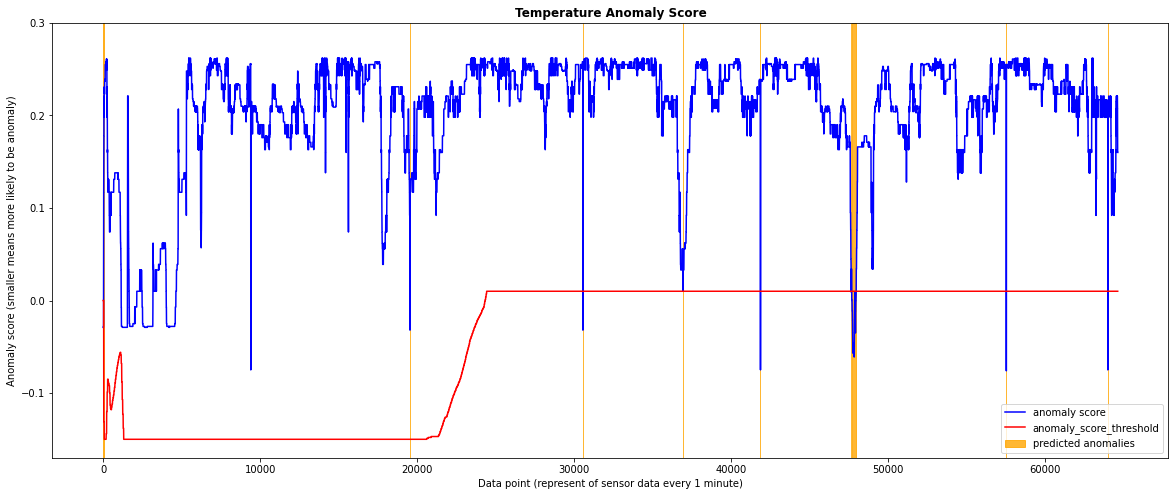

In [44]:
x = np.arange(64645)
y = df_status['status']
#df_thresh= df_thresh.add(-0.05)
print(type(y))
fig, ax = plt.subplots()
ax.set_ylim(-0.17,0.3)
ax.set_title('Temperature Anomaly Score', fontweight ="bold")
ax.set_xlabel('Data point (represent of sensor data every 1 minute)')
ax.set_ylabel('Anomaly score (smaller means more likely to be anomaly)')
c1 = ax.plot(df_score,'b')
c2 = ax.plot(df_thresh, 'r')
c3 = ax.fill_between(x,0,1, where= y == -1,
                color='orange', alpha=0.8, transform=ax.get_xaxis_transform())
ax.legend([c1, c2,c3], labels=['anomaly score', 'anomaly_score_threshold', 'predicted anomalies'])

<class 'pandas.core.series.Series'>


C:\Users\Radityo Fajar\AppData\Local\Temp\ipykernel_13128\1497124666.py:19: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend([c1,c2,c3,c4], labels=['Sensor value', 'lower_threshold', 'upper_threshold', 'predicted anomalies'])


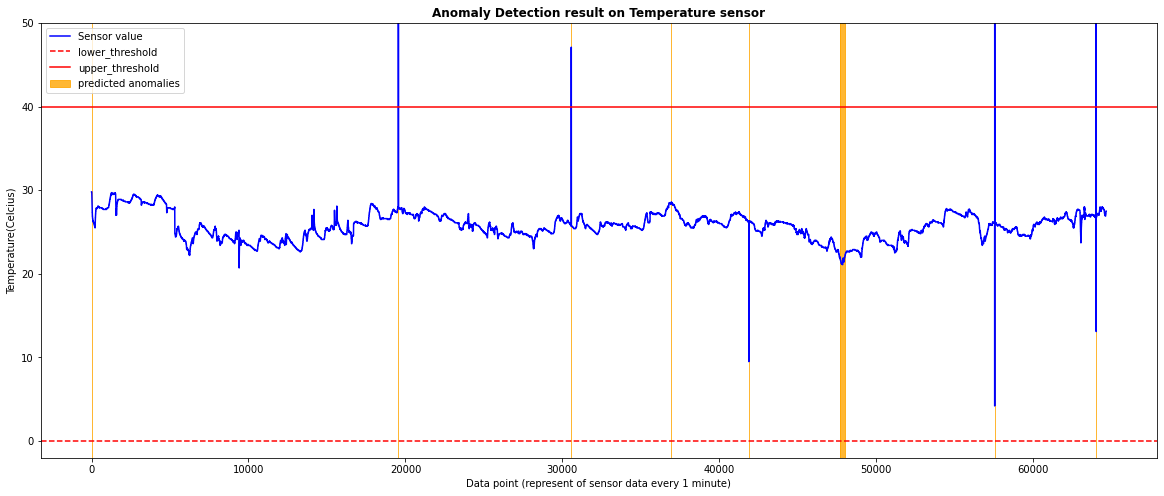

In [45]:
x = np.arange(64645)
y = df_status['status']
y2 = df_score['score']
y3 = df_data['data']
print(type(y))
fig, ax = plt.subplots()
ax.set_ylim(-2,50)
ax.set_title('Anomaly Detection result on Temperature sensor', fontweight ="bold")
ax.set_xlabel('Data point (represent of sensor data every 1 minute)')
ax.set_ylabel('Temperature(Celcius)')

c1 = ax.plot(df_data, 'b')
c2 = ax.axhline(y=0, color='red', linestyle='--')
c3 = ax.axhline(y=40, color='red')
c4 = ax.fill_between(x,0, 1, where= y < 0,
                color='orange', alpha=0.8, transform=ax.get_xaxis_transform())
#ax.fill_between(x,0, 1, where= y3 == 1,
#               color='red', alpha=0.5, transform=ax.get_xaxis_transform())
ax.legend([c1,c2,c3,c4], labels=['Sensor value', 'lower_threshold', 'upper_threshold', 'predicted anomalies'])